Import library

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app, reviews, Sort, reviews_all
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [ ]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


In [ ]:
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google_play_scraper import app, reviews_all, Sort

scraping

In [ ]:
scrapreview = reviews_all(
    'id.go.jakarta.smartcity.jaki',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=3000
)

In [ ]:
import csv

with open('ulasan_jaki_app.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])
    for review in scrapreview:
        writer.writerow([review['content']])

Load dataset

In [ ]:
df = pd.DataFrame(scrapreview)
df.to_csv('ulasan_jaki_app.csv', index=False)

In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d105355e-6247-44d7-a295-6f9c5fec4ed4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dulu bagus banget jaki tidak delay skrng loadi...,1,2,3.0.6,2024-06-30 07:03:07,"Hi kak Difa, mohon maaf atas ketidaknyamananny...",2024-07-02 04:04:50,3.0.6
1,a2b50dfe-5940-4c46-945b-b3becb31f7b3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bintang 4 dulu ya, Berapa Persen keamanan bagi...",4,0,3.0.6,2024-07-12 11:35:31,Hi kak Indra terima kasih atas ulasannya. Tamb...,2024-07-15 07:03:27,3.0.6
2,7d14cc5b-2742-4660-ac0b-1d58f92bc91d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Idiot, gak guna. mau daftar suruh konfirmasi l...",1,0,3.0.6,2024-07-11 10:49:39,"Hi kak Radit, mohon maaf atas ketidaknyamanann...",2024-07-12 03:26:00,3.0.6
3,5f2999dc-f890-4f89-b141-2cc795eed428,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya melaporkan tentang parkir liar dari tangg...,1,0,3.0.6,2024-07-14 03:39:08,"Hi kak Michael, mohon maaf atas ketidaknyamana...",2024-07-15 07:26:42,3.0.6
4,a464394d-5b97-4a15-9a4b-ae0a0bb40b49,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Halo, saya pengguna baru aplikasi ini. Apakah ...",4,6,3.0.6,2024-05-24 02:56:45,"Hai, Kak Utami. mohon maaf atas ketidaknyamana...",2024-05-29 06:56:13,3.0.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4429 entries, 0 to 4428
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              4429 non-null   object        
 1   userName              4429 non-null   object        
 2   userImage             4429 non-null   object        
 3   content               4429 non-null   object        
 4   score                 4429 non-null   int64         
 5   thumbsUpCount         4429 non-null   int64         
 6   reviewCreatedVersion  3499 non-null   object        
 7   at                    4429 non-null   datetime64[ns]
 8   replyContent          2758 non-null   object        
 9   repliedAt             2758 non-null   datetime64[ns]
 10  appVersion            3499 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 380.7+ KB


In [ ]:
data_baru_df = df.dropna()

In [ ]:
data_baru_df.drop_duplicates()
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = data_baru_df.shape

In [ ]:
data_baru_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2170 entries, 0 to 4068
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              2170 non-null   object        
 1   userName              2170 non-null   object        
 2   userImage             2170 non-null   object        
 3   content               2170 non-null   object        
 4   score                 2170 non-null   int64         
 5   thumbsUpCount         2170 non-null   int64         
 6   reviewCreatedVersion  2170 non-null   object        
 7   at                    2170 non-null   datetime64[ns]
 8   replyContent          2170 non-null   object        
 9   repliedAt             2170 non-null   datetime64[ns]
 10  appVersion            2170 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 203.4+ KB


Preprocessing

In [ ]:
!pip install Sastrawi

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def bersihkanData(pola):
    pola = re.sub(r'@[A-Za-z0-9]+', '', pola)
    pola = re.sub(r'#[A-Za-z0-9]+', '', pola)
    pola = re.sub(r'RT[\s]+', '', pola)
    pola = re.sub(r"http\S+", '', pola)
    pola = re.sub(r'[0-9]+', '', pola)
    pola = re.sub(r'[^\w\s]', '', pola)

    pola = pola.replace('\n', ' ')
    pola = pola.translate(str.maketrans('', '', string.punctuation))
    pola = pola.strip()
    return pola
def ubahText(pola):
    # Mengubah semua karakter dalam teks menjadi huruf kecil
    return pola.lower()

def tokenizingText(pola):
    # Memecah atau membagi string, teks menjadi daftar token
    return word_tokenize(pola)

def filteringText(pola):
    # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya', 'gaa', 'loh',
                          'kah', 'woi', 'woii', 'woy', 'saya', 'kamu', 'dia', 'mereka', 'ini', 'itu', 'yang',
                          'dengan', 'atau', 'untuk', 'pada', 'juga', 'adalah', 'sebuah', 'apa', 'ada', 'yang',
                          'akan', 'bisa', 'telah', 'sudah', 'oleh', 'pada', 'di', 'dari', 'dengan', 'sebagai',
                          'kita', 'kami', 'anda', 'beliau', 'seperti', 'jika', 'meskipun', 'walaupun', 'sehingga'])

    filtered = [word for word in pola if word not in listStopwords]
    return filtered

def stemmingText(pola):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = pola.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    return ' '.join(stemmed_words)

def toSentence(list_words):

    return ' '.join(word for word in list_words)

In [ ]:
slangwords = {
    "@": "di",
    "abis": "habis",
    "wtb": "beli",
    "masi": "masih",
    "wts": "jual",
    "wtt": "tukar",
    "bgt": "banget",
    "maks": "maksimal",
    "gue": "saya",
    "lo": "kamu",
    "elo": "kamu",
    "gk": "tidak",
    "jd": "jadi",
    "ntar": "nanti",
    "bisa": "dapat",
    "gak": "tidak",
    "jgn": "jangan",
    "mungkin": "kemungkinan",
    "aja": "saja",
    "klo": "kalau",
    "yg": "yang",
    "aja": "saja",
    "gw": "saya",
    "bh": "bahwa",
    "lu": "kamu",
    "bro": "saudara",
    "sis": "saudara",
    "cewek": "perempuan",
    "cowok": "laki-laki",
    "gpp": "tidak masalah",
    "km": "kamu",
    "pake": "gunakan",
    "nggak": "tidak",
    "kalo": "kalau",
    "knp": "kenapa"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        # Menghapus tanda baca yang mungkin ada di akhir kata
        word_cleaned = word.strip(string.punctuation).lower()
        # Mengganti kata slang jika ada
        if word_cleaned in slangwords:
            fixed_words.append(slangwords[word_cleaned])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text


In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
data_baru_df['text_clean'] = data_baru_df['content'].apply(bersihkanData)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
data_baru_df['text_casefoldingText'] = data_baru_df['text_clean'].apply(ubahText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
data_baru_df['text_slangwords'] = data_baru_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
data_baru_df['text_tokenizingText'] = data_baru_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
data_baru_df['text_stopword'] = data_baru_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
data_baru_df['text_akhir'] = data_baru_df['text_stopword'].apply(toSentence)

In [ ]:
data_baru_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,d105355e-6247-44d7-a295-6f9c5fec4ed4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dulu bagus banget jaki tidak delay skrng loadi...,1,2,3.0.6,2024-06-30 07:03:07,"Hi kak Difa, mohon maaf atas ketidaknyamananny...",2024-07-02 04:04:50,3.0.6,Dulu bagus banget jaki tidak delay skrng loadi...,dulu bagus banget jaki tidak delay skrng loadi...,dulu bagus banget jaki tidak delay skrng loadi...,"[dulu, bagus, banget, jaki, tidak, delay, skrn...","[bagus, banget, jaki, delay, skrng, loadingnya...",bagus banget jaki delay skrng loadingnya trss ...
1,a2b50dfe-5940-4c46-945b-b3becb31f7b3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bintang 4 dulu ya, Berapa Persen keamanan bagi...",4,0,3.0.6,2024-07-12 11:35:31,Hi kak Indra terima kasih atas ulasannya. Tamb...,2024-07-15 07:03:27,3.0.6,Bintang dulu ya Berapa Persen keamanan bagi p...,bintang dulu ya berapa persen keamanan bagi p...,bintang dulu ya berapa persen keamanan bagi pe...,"[bintang, dulu, ya, berapa, persen, keamanan, ...","[bintang, persen, keamanan, pembuat, berita, p...",bintang persen keamanan pembuat berita pengadu...
2,7d14cc5b-2742-4660-ac0b-1d58f92bc91d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Idiot, gak guna. mau daftar suruh konfirmasi l...",1,0,3.0.6,2024-07-11 10:49:39,"Hi kak Radit, mohon maaf atas ketidaknyamanann...",2024-07-12 03:26:00,3.0.6,Idiot gak guna mau daftar suruh konfirmasi lew...,idiot gak guna mau daftar suruh konfirmasi lew...,idiot tidak guna mau daftar suruh konfirmasi l...,"[idiot, tidak, guna, mau, daftar, suruh, konfi...","[idiot, daftar, suruh, konfirmasi, link, dikir...",idiot daftar suruh konfirmasi link dikirim ema...
3,5f2999dc-f890-4f89-b141-2cc795eed428,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya melaporkan tentang parkir liar dari tangg...,1,0,3.0.6,2024-07-14 03:39:08,"Hi kak Michael, mohon maaf atas ketidaknyamana...",2024-07-15 07:26:42,3.0.6,Saya melaporkan tentang parkir liar dari tangg...,saya melaporkan tentang parkir liar dari tangg...,saya melaporkan tentang parkir liar dari tangg...,"[saya, melaporkan, tentang, parkir, liar, dari...","[melaporkan, parkir, liar, tanggal, juli, tind...",melaporkan parkir liar tanggal juli tindak pro...
4,a464394d-5b97-4a15-9a4b-ae0a0bb40b49,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Halo, saya pengguna baru aplikasi ini. Apakah ...",4,6,3.0.6,2024-05-24 02:56:45,"Hai, Kak Utami. mohon maaf atas ketidaknyamana...",2024-05-29 06:56:13,3.0.6,Halo saya pengguna baru aplikasi ini Apakah ap...,halo saya pengguna baru aplikasi ini apakah ap...,halo saya pengguna baru aplikasi ini apakah ap...,"[halo, saya, pengguna, baru, aplikasi, ini, ap...","[halo, pengguna, aplikasi, aplikasi, berfungsi...",halo pengguna aplikasi aplikasi berfungsi akse...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3780,482dd6d8-1242-4302-b136-1aabb57cb45c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,5,0,1.1.32,2021-12-04 07:59:46,"Hi kak, Terima kasih atas ulasannya ya. Kami a...",2021-12-06 03:00:50,1.1.32,Ok,ok,ok,[ok],[ok],ok
3861,060a61c5-b7e8-4027-bff2-2701239b4893,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,5,0,1.1.3,2021-02-16 17:21:45,"Hi kak, terima kasih ya atas reviewnya :)",2021-02-22 09:34:40,1.1.3,Ok,ok,ok,[ok],[ok],ok
3996,64908238-4589-4823-808a-670026fa2c98,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"JakCLM 502 bad gateway nginx/1.16.1 , gimana m...",1,0,1.1.33,2020-07-22 16:23:20,"Hai Jakizen, mohon untuk dilakukan upgrade kem...",2020-07-23 02:51:48,1.1.33,JakCLM bad gateway nginx gimana mau isi kala...,jakclm bad gateway nginx gimana mau isi kala...,jakclm bad gateway nginx gimana mau isi k

In [ ]:
lexicon_positive = {
    "baik": 2,
    "bagus": 3,
    "puas": 2,
    "menyenangkan": 4,
    "suka": 3,
    "favorit": 5,
    "cinta": 4,
    "terbaik": 5,
    "hebat": 4,
    "keren": 3,
    "gemilang": 4,
    "berhasil": 3,
    "menarik": 3,
    "memuaskan": 4,
    "berkualitas": 4,
    "cerah": 2,
    "positif": 3,
    "luar biasa": 5,
    "indah": 3,
    "sehat": 3,
    "efisien": 3,
    "mantap": 3,
    "penuh": 2,
    "senang": 3,
    "terpuji": 4,
    "baik hati": 4,
    "ceria": 3,
    "nyaman": 3,
    "top": 4,
    "percaya diri": 4,
    "bisa diandalkan": 4,
    "terpercaya": 4,
    "ideal": 5,
    "elegan": 3,
    "luar biasa": 5,
    "menyentuh": 4,
    "tulus": 3,
    "berhasil": 3,
    "luar biasa": 5,
    "sukses": 4,
    "pintar": 3,
    "terjangkau": 3,
    "harmonis": 4,
    "asik": 3,
    "tangkas": 3,
    "efektif": 3,
    "kreatif": 4,
    "terobosan": 5,
    "canggih": 4,
    "smart": 4,
    "selamat": 2,
    "bisa": 3,
    "fokus": 3,
    "jelas": 3,
    "tepat": 3,
    "empati": 4,
    "baik-baik saja": 2,
    "bermanfaat": 4,
    "terasa nyaman": 3,
    "mengagumkan": 5,
    "bijaksana": 4,
    "penuh perhatian": 4,
    "pantas": 3,
    "optimal": 4
}

lexicon_negative = {
    "buruk": -3,
    "jelek": -4,
    "tidak puas": -2,
    "menyedihkan": -4,
    "kekecewaan": -5,
    "kesal": -3,
    "sial": -4,
    "merugikan": -4,
    "seram": -3,
    "bencana": -5,
    "cacat": -4,
    "gagal": -4,
    "frustrasi": -4,
    "bermasalah": -4,
    "aneh": -3,
    "hancur": -5,
    "mengganggu": -3,
    "negatif": -3,
    "kotor": -3,
    "jelek sekali": -5,
    "kritis": -4,
    "terlambat": -3,
    "rusak": -4,
    "kacau": -4,
    "noda": -3,
    "susah": -3,
    "merugikan": -4,
    "menyusahkan": -4,
    "tidak nyaman": -4,
    "mengecewakan": -4,
    "sulit": -3,
    "hambar": -3,
    "mengganggu": -4,
    "beracun": -5,
    "kelam": -3,
    "buruk sekali": -5,
    "mengerikan": -4,
    "lemot": -3,
    "terlalu lambat": -4,
    "kurang": -3,
    "kekecewaan": -5,
    "buruk": -3,
    "kecewa": -4,
    "mendongkol": -3,
    "menggerutu": -3,
    "sakit": -4,
    "tidak berguna": -4,
    "berat": -3,
    "mengherankan": -3,
    "kurang memuaskan": -4,
    "pahit": -4,
    "buruknya": -4,
    "nyebelin": -3,
    "membosankan": -3,
    "menjemukan": -3,
    "depresi": -5
}


def label_sentiment(text):
    text = bersihkanData(text)
    text = ubahText(text)
    text = tokenizingText(text)
    text = filteringText(text)
    text = stemmingText(text)

    score = 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score -= lexicon_negative[word]

    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'


In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]

    for word in text:
        if word in lexicon_negative:
            score += lexicon_negative[word]

    polarity = ''
    if score >= 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'

    return score, polarity


In [ ]:
results = data_baru_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data_baru_df['polarity_score'] = results[0]
data_baru_df['polarity'] = results[1]
print(data_baru_df['polarity'].value_counts())

polarity
positive    1971
negative     199
Name: count, dtype: int64


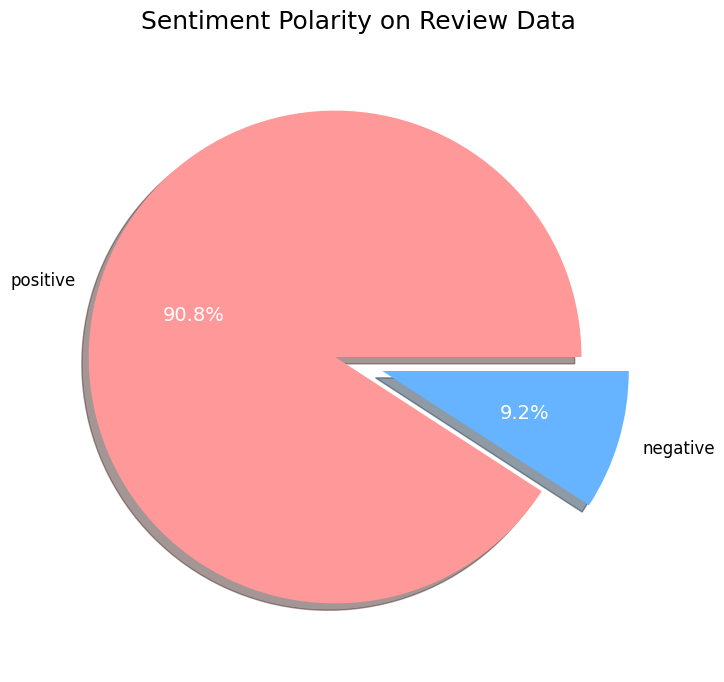

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

sizes = [count for count in data_baru_df['polarity'].value_counts()]
labels = list(data_baru_df['polarity'].value_counts().index)

explode = (0.1, 0.1)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

wedges, texts, autotexts = ax.pie(
    x=sizes,
    labels=labels,
    autopct='%1.1f%%',
    explode=explode,
    colors=colors,
    shadow=True,
    textprops={'fontsize': 12}
)

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_color('white')

for text in texts:
    text.set_fontsize(12)

ax.set_title('Sentiment Polarity on Review Data', fontsize=18, pad=20)

plt.show()


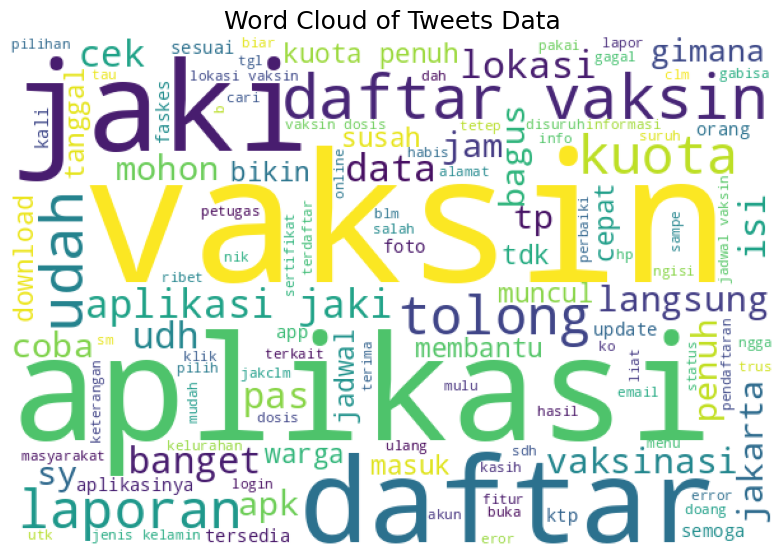

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 3000)

positive_tweets = data_baru_df[data_baru_df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

negative_tweets = data_baru_df[data_baru_df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)
negative_tweets = negative_tweets.head(10)
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

list_words = ''
for tweet in data_baru_df['text_stopword']:
    list_words += ' '.join(tweet)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud)
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()


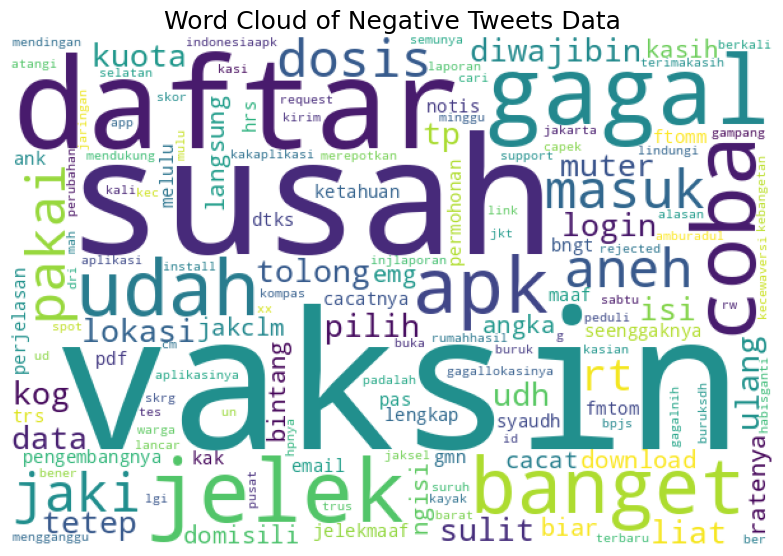

In [ ]:
list_words = ''
for tweet in negative_tweets['text_stopword']:
    list_words += ' '.join(tweet)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud)
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()


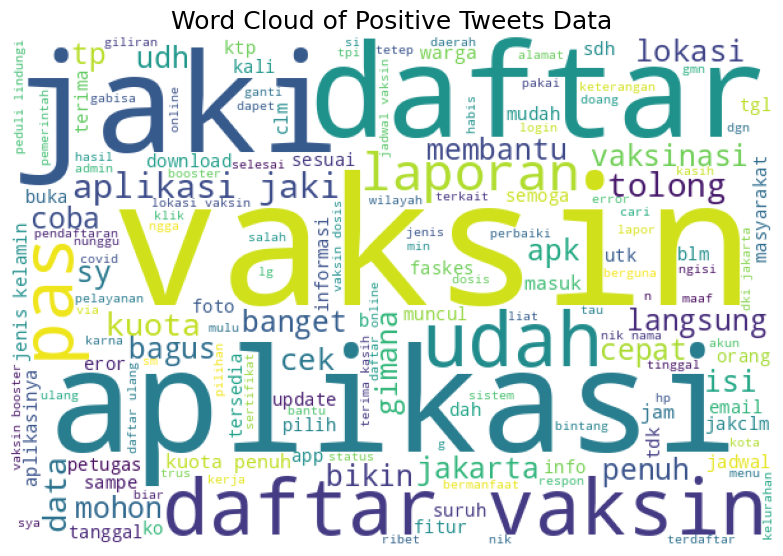

In [ ]:
list_words = ''
for tweet in positive_tweets['text_stopword']:
    list_words += ' '.join(tweet)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud)
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()


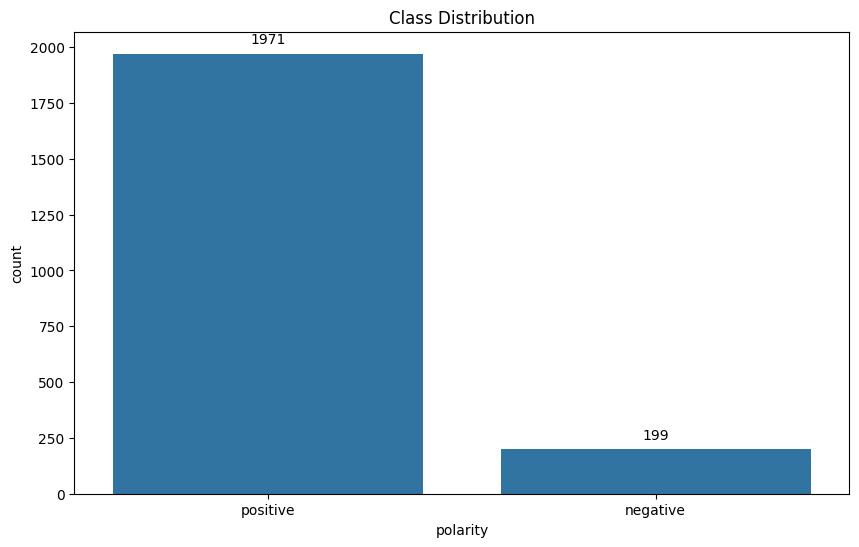

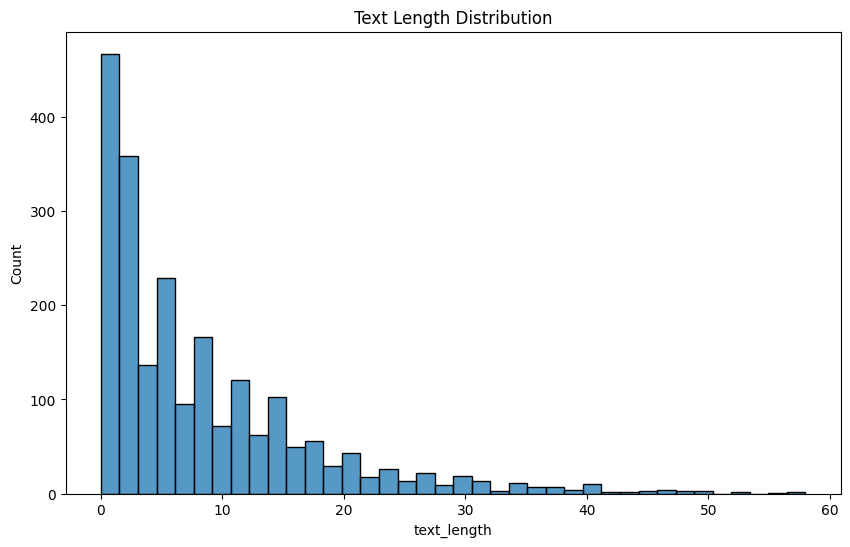

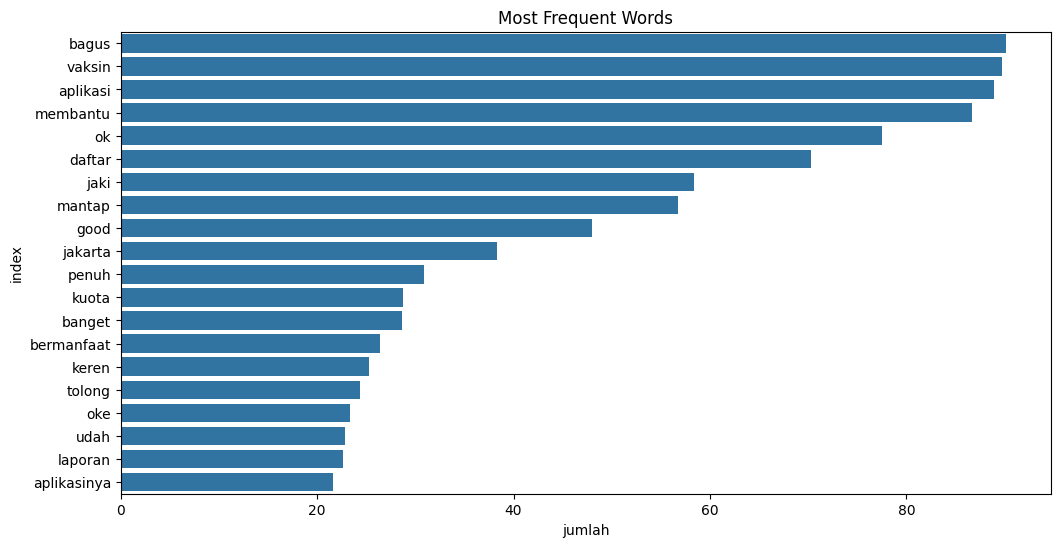

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=data_baru_df)
plt.title('Class Distribution')
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')
plt.show()

plt.figure(figsize=(10, 6))
data_baru_df['text_length'] = data_baru_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(data_baru_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_baru_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

Data Splitting

In [ ]:
data_baru_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,d105355e-6247-44d7-a295-6f9c5fec4ed4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Dulu bagus banget jaki tidak delay skrng loadingnya makin lama trss kalo mau liat laporan terdekat kita, kita filter tetep aja laporan yg jauh yg nampil tidak seperti dulu bisa difilter laporanya",1,2,3.0.6,2024-06-30 07:03:07,"Hi kak Difa, mohon maaf atas ketidaknyamanannya. Mohon pastikan aplikasi JAKI kakak sudah versi terbaru dan jaringan internet kakak stabil ya. Jika masih ada kendala kakak bisa menjelaskan kronologi yang terjadi ke email ke dki@jakarta.go.id, Karena kami membutuhkan informasi tambahan. Terima kasih telah menggunakan JAKI :) #LS",2024-07-02 04:04:50,3.0.6,Dulu bagus banget jaki tidak delay skrng loadingnya makin lama trss kalo mau liat laporan terdekat kita kita filter tetep aja laporan yg jauh yg nampil tidak seperti dulu bisa difilter laporanya,dulu bagus banget jaki tidak delay skrng loadingnya makin lama trss kalo mau liat laporan terdekat kita kita filter tetep aja laporan yg jauh yg nampil tidak seperti dulu bisa difilter laporanya,dulu bagus banget jaki tidak delay skrng loadingnya makin lama trss kalau mau liat laporan terdekat kita kita filter tetep saja laporan yang jauh yang nampil tidak seperti dulu dapat difilter laporanya,"[dulu, bagus, banget, jaki, tidak, delay, skrng, loadingnya, makin, lama, trss, kalau, mau, liat, laporan, terdekat, kita, kita, filter, tetep, saja, laporan, yang, jauh, yang, nampil, tidak, seperti, dulu, dapat, difilter, laporanya]","[bagus, banget, jaki, delay, skrng, loadingnya, trss, liat, laporan, terdekat, filter, tetep, laporan, nampil, difilter, laporanya]",bagus banget jaki delay skrng loadingnya trss liat laporan terdekat filter tetep laporan nampil difilter laporanya,3,positive,16
1,a2b50dfe-5940-4c46-945b-b3becb31f7b3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Bintang 4 dulu ya, Berapa Persen keamanan bagi pembuat berita, atau pengadu yang di kirim lewat jaki, siapa yang tanggung jawab atas identitas pengaduan, apakah ada personal yang bisa bebas buka Jaki dari pusat (server) nya???, apalagi info kebocoran data sekarang lagi marak. Terima kasih",4,0,3.0.6,2024-07-12 11:35:31,Hi kak Indra terima kasih atas ulasannya. Tambahan informasi untuk keamanan data di JAKI tidak usah khawatir karena dikelola oleh Jakarta Smart City dibawah Dinas Kominfotik Pemprov Jakarta dan sudah berstandar ISO / IEC 27001 : 2022 mengenai information security management systems. Semoga membantu :) #LS,2024-07-15 07:03:27,3.0.6,Bintang dulu ya Berapa Persen keamanan bagi pembuat berita atau pengadu yang di kirim lewat jaki siapa yang tanggung jawab atas identitas pengaduan apakah ada personal yang bisa bebas buka Jaki dari pusat server nya apalagi info kebocoran data sekarang lagi marak Terima kasih,bintang dulu ya berapa persen keamanan bagi pembuat berita atau pengadu yang di kirim lewat jaki siapa yang tanggung jawab atas identitas pengaduan apakah ada personal yang bisa bebas buka jaki dari pusat server nya apalagi info kebocoran data sekarang lagi marak terima kasih,bintang dulu ya berapa persen keamanan bagi pembuat berita atau pengadu yang di kirim lewat jaki siapa yang tanggung jawab atas identitas pengaduan apakah ada personal yang dapat bebas buka jaki dari pusat server nya apalagi info kebocoran data sekarang lagi marak terima kasih,"[bintang, dulu, ya, berapa, persen, keamanan, bagi, pembuat, berita, atau, pengadu, yang, di, kirim, lewat, jaki, siapa, yang, tanggung, jawab, atas, identitas, pengaduan, apakah, ada, personal, yang, dapat, bebas, buka, jaki, dari, pusat

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = data_baru_df['text_akhir']
y = data_baru_df['polarity']

In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,admin,akun,alamat,apk,aplikasi,aplikasinya,app,bagus,banget,bantu,...,udh,ulang,update,utk,vaksin,vaksinasi,verifikasi,via,warga,wilayah
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.272438,0.302968,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.346782,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.488842,0.000000,0.000000,0.346691,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2166,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2167,0.0,0.0,0.0,0.0,0.000000,0.432446,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2168,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Pemodelan Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()
naive_bayes.fit(X_train.toarray(), y_train)

y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)


Naive Bayes - accuracy_train: 0.9066820276497696
Naive Bayes - accuracy_test: 0.8755760368663594


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)


Random Forest - accuracy_train: 0.9942396313364056
Random Forest - accuracy_test: 0.9608294930875576


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9481566820276498
Logistic Regression - accuracy_test: 0.923963133640553


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9942396313364056
Decision Tree - accuracy_test: 0.9423963133640553


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})

accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0          Naive Bayes       0.875576
1        Random Forest       0.960829
2  Logistic Regression       0.923963
3        Decision Tree       0.942396


In [ ]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)
print(accuracy_test_sorted)


                 Model  Accuracy Test
1        Random Forest       0.960829
3        Decision Tree       0.942396
2  Logistic Regression       0.923963
0          Naive Bayes       0.875576


In [ ]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = bersihkanData(kalimat_baru)
kalimat_baru_casefolded = ubahText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: bagus aplikasinya
Sentimen kalimat baru adalah POSITIF.
